<table align="left" >

  <tr><th >
      <a target="_blank"  href="http://www.fsdmfes.ac.ma/"><img src="https://raw.githubusercontent.com/m-elkhou/Object-Detection/master/assets/usmba.png" width=70px /></a>
  </th><th>
      <a target="_blank"  href="http://www.fsdmfes.ac.ma/"><img src="https://raw.githubusercontent.com/m-elkhou/Object-Detection/master/assets/fsdm.png" width=75px/></a>
  </th><th>
      <a target="_blank"  href="https://www.univ-paris13.fr/"><img src="https://raw.githubusercontent.com/m-elkhou/Object-Detection/master/assets/uspn.png" width=150px/></a>
  </th></tr>

  <tr><td style="text-align:center;">
      <a target="_blank"  href="http://www.fsdmfes.ac.ma/">USMBA</a>
  </td><td style="text-align:center;">
      <a target="_blank"  href="http://www.fsdmfes.ac.ma/">FSDM</a>
  </td><td style="text-align:center;">
      <a target="_blank"  href="https://www.univ-paris13.fr/">USPN</a>
  </td></tr>
  
</table>
</br>

***

# Deep Learning TP 2 : Perceptron Multi-Couches

***

</br>

**Réalisée par :**
- [Mohammed EL-KHOU](https://www.linkedin.com/in/m-elkhou/)
>- mohammed.elkhou1@usmba.ac.ma
>- m.elkhou@hotmail.com

**Encadré par :**
- Mr. [Nistor Grozavu](https://lipn.univ-paris13.fr/~grozavu/)
>- nistor.grozavu@lipn.univ-paris13.fr
>- nistor.grozavu@gmail.com

</br>
<a href="https://colab.research.google.com/github/m-elkhou/Deep_Learning/blob/master/DeepLearningTP2.ipynb">
    <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory">
</a>
</br>

***

In [79]:
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

In [80]:
from jupyterthemes import jtplot
jtplot.style()
plt.rcParams["figure.figsize"] = (12,7)

## A) Régression avec un Perceptron Multi-Couches

1. Créez un ensemble de points (une 20ène) suivant une fonction sinusoïde avec un bruit
gaussien d'écart type 0,2. On va essayer de retrouver la fonction à partir des points avec
un Perceptron Multi-Couches (MLP). Analyser la documentation sur MLP dans la
librairie scikit-learn et analysez toutes les parametres.

> x = np.linspace(0,8,20).reshape(-1,1)

> y = np.sin(x) + np.random.randn(20)*0.2

In [89]:
x = np.linspace(0,8,20).reshape(-1,1)
y = np.sin(x) + np.random.randn(20)*0.2

x.shape, y.shape

((20, 1), (20, 20))

2. Initialisez le MLP avec la fonction MLPRegressor. On veut 3 neurones cachés, une
fonction d'activation linéaire et un pas d'apprentissage (learning rate) de 0,1 avec un
nombre d’iterations de 100.


In [119]:
from sklearn.neural_network import MLPRegressor
# Supported activations are ('identity', 'logistic', 'tanh', 'relu').
# le seul fonction d'activation linéaire existe dans MLPRegressor est la fonction 'identity' de l'equation f(x)=x
mlp = MLPRegressor(hidden_layer_sizes=3, activation='identity', learning_rate_init=0.1, max_iter=100)

3. Lancez l'apprentissage du MLP. Utilisez la fonction fit.

In [120]:
mlp.fit(x,y[:,1])

MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=3, learning_rate='constant',
             learning_rate_init=0.1, max_iter=100, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

4. La fonction predict permet d'utiliser le MLP appris pour faire de la régression.


In [121]:
y_hat = mlp.predict(x)

5. Tracez sur une même figure

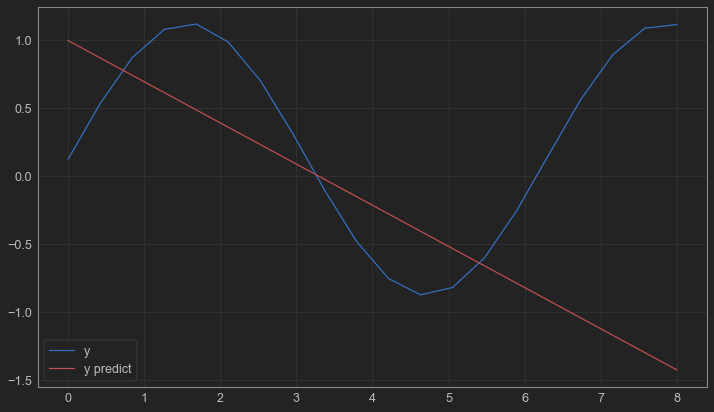

In [122]:
plt.plot(x,y[:,1], c='b', label='y')
plt.plot(x,y_hat, c='r', label='y predict')
plt.legend()
plt.show()

### Résumé :
	
Comme dans les réseaux de neurones, les Perceptron multicouche (MLP) ont une couche d'entrée, une couche cachée et une couche de sortie. Il a la même structure qu'un perceptron monocouche avec une ou plusieurs couches cachées. Un perceptron monocouche ne peut classer que les classes linéaires séparables avec une sortie binaire (0,1), mais MLP peut classer les classes non linéaires.

À l'exception de la couche d'entrée, chaque nœud des autres couches utilise une fonction d'activation non linéaire. Cela signifie que les couches d'entrée, les données qui arrivent et la fonction d'activation sont basées sur l'addition de tous les nœuds et poids, produisant la sortie. MLP utilise une méthode d'apprentissage supervisé appelée «rétropropagation». En rétropropagation, le réseau neuronal calcule l'erreur à l'aide de la fonction de coût. Il propage cette erreur vers l'arrière d'où elle vient (ajuste les poids pour former le modèle plus précisément).

Donc, Quel est le rôle des fonctions d'activation dans un MLP ou réseau neuronal en général?
	
Au niveau le plus élémentaire, une fonction d'activation décide si un neurone doit être déclenché ou non. Il accepte la somme pondérée des entrées et le biais comme entrée pour toute fonction d'activation.

Cette fonction est en fait la composé de la fonction d'activation de chaque neurone. La composé de fonctions non linéaire est une fonction non linéaire. Et de même la composé d'une fonction linéaire est une fonction linéaire.

Donc pourquoi la fonction d'activation est non linéaire comme 'logistic', 'tanh', 'relu', 'Sinusoid'..., parce que si elle était linéaire cela voudrait dire que le réseau de neurone serait une fonction lineaire de type ax+b=y. Dans ce cas là, le réseau de neurone serait inutile car il suffirait de 2 cas pour déterminer directement les paramètres à et b. Du coup pas besoin de s'embêter avec une structure complexe et un entraînement coûteux.

C:\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


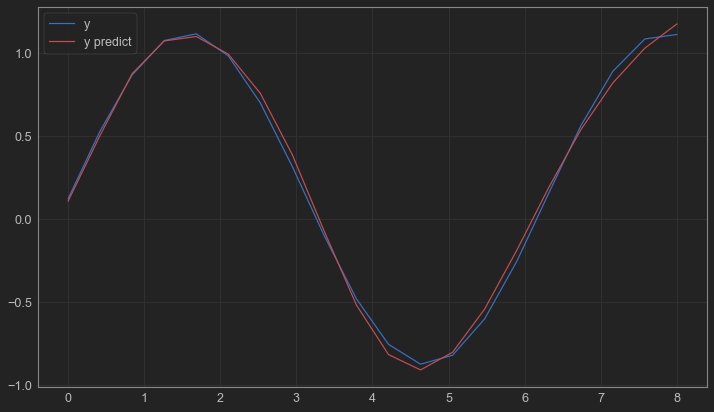

In [115]:
mlp = MLPRegressor(hidden_layer_sizes=3, activation='logistic', learning_rate_init=0.1, max_iter=100)
y_hat = mlp.fit(x,y[:,1]).predict(x)

plt.plot(x,y[:,1], c='b', label='y')
plt.plot(x,y_hat, c='r', label='y predict')
plt.legend()
plt.show()

C:\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


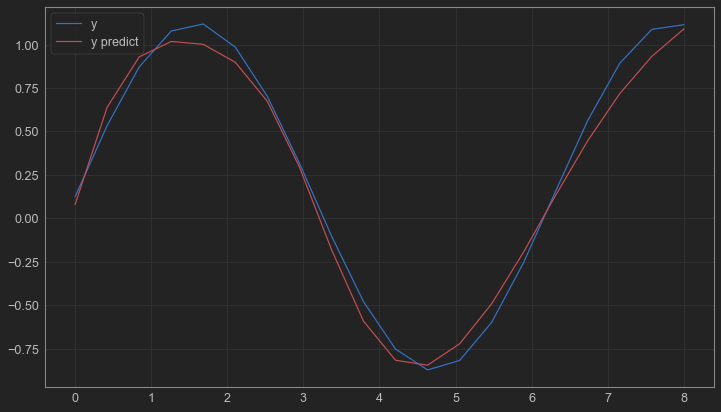

In [129]:
mlp = MLPRegressor(hidden_layer_sizes=3, activation='tanh', learning_rate_init=0.1, max_iter=100)
y_hat = mlp.fit(x,y[:,1]).predict(x)

plt.plot(x,y[:,1], c='b', label='y')
plt.plot(x,y_hat, c='r', label='y predict')
plt.legend()
plt.show()

## B) Classification avec un Perceptron Multi-Couches

1. Les données IRIS sont constituées de 4 colonnes qui correspondent à 4 variables de
description. La 5ème colonne donne la classe de chaque objet. Transformez ces données en
deux matrices contenant les données et le label (target).


In [158]:
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data
target = iris.target

data.shape, target.shape

((150, 4), (150,))

2. Pour permettre l'apprentissage par un MLP, il faut « binariser » les numéros de classe.


In [159]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [157]:
# target = np.where(target>=1,1,0)
# target

3. Initialisez le MLP avec la fonction MLPClassifier. On veut 2 neurones cachés, une
fonction d'activation logistique et un pas d'apprentissage de 0,2.


In [154]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(hidden_layer_sizes=2, activation='logistic', learning_rate_init=0.2)

4. On garde les mêmes options que dans l'exercice precedent. Lancez l'apprentissage du
MLP avec la fonction fit. On veut utiliser l'algorithme d'optimisation de descente de
gradient stochastique (lbfgs).


In [160]:
MLPC = MLPClassifier(hidden_layer_sizes=2, activation='logistic', learning_rate_init=0.2, solver='lbfgs')
MLPC.fit(data, target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.2, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

5. Affichez les résultats désirés et les résultats obtenus dans une même figure. Vous pouvez
utiliser un ACP par exemple. Chaque point aura une couleur différente selon sa classe.
Les résultats sont-ils bon ?

No handles with labels found to put in legend.


accuracy_score :  0.9933333333333333


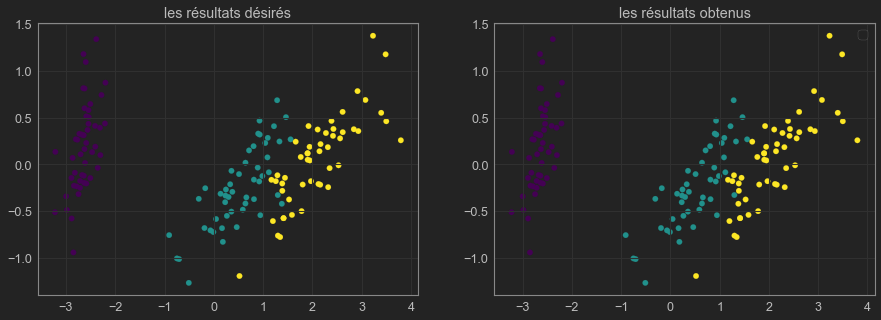

In [161]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

pca = PCA(n_components=2)
data_tr = pca.fit_transform(data)

target_pr = MLPC.predict(data)

def plot_result(X, y, y_hat):
    print('accuracy_score : ', accuracy_score(y, y_hat))

    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title('les résultats désirés')
    plt.subplot(1,2,2)
    plt.scatter(X[:,0], X[:,1], c=y_hat)
    plt.title('les résultats obtenus')
    plt.legend()
    plt.show()

plot_result(data_tr, target, target_pr)

6. Essayez de normaliser les données (centrées – réduites). Cela améliore-t-il la
classification ?


accuracy_score :  0.04666666666666667


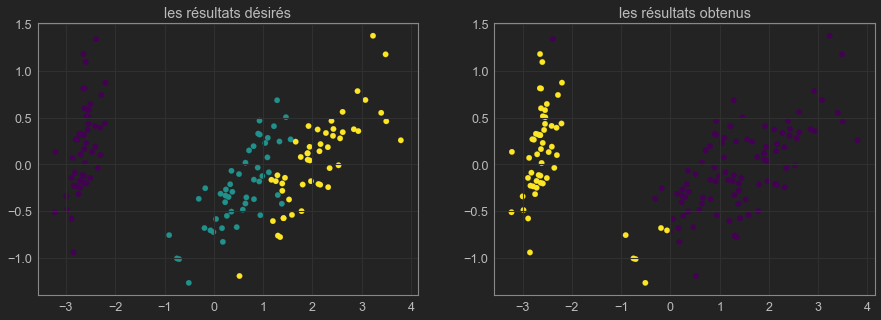

In [145]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
mms = MinMaxScaler()
data_transformed = mms.fit_transform(data)

target_pr = MLPC.predict(data_transformed)
plot_result(data_tr, target, target_pr)

accuracy_score :  0.26


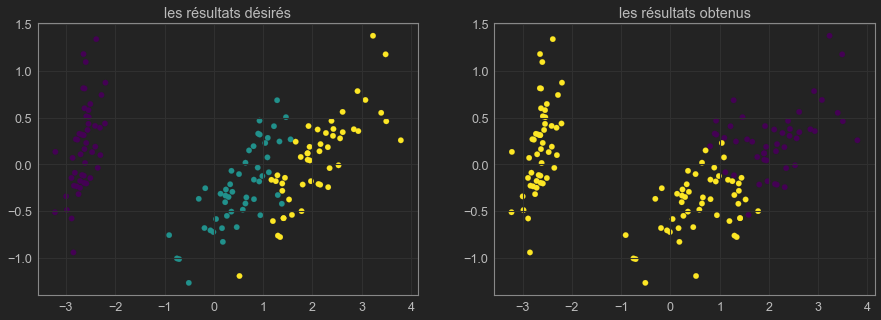

In [141]:
stdS = StandardScaler()
data_transformed = stdS.fit_transform(data)
target_pr = MLPC.predict(data_transformed)
plot_result(data_tr, target, target_pr)

accuracy_score :  0.26


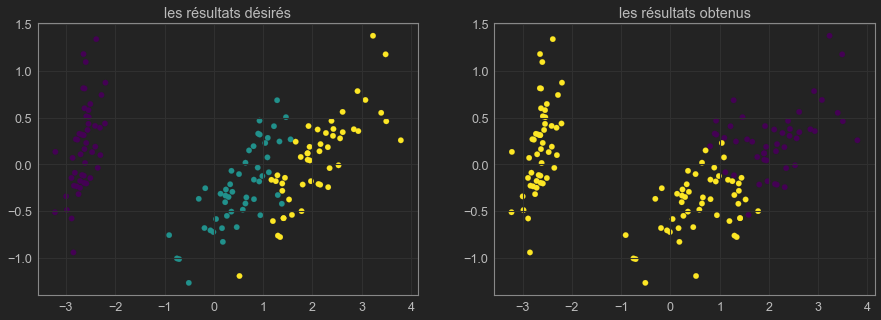

In [142]:
data_transformed = scale(data)
target_pr = MLPC.predict(data_transformed)
plot_result(data_tr, target, target_pr)

7. Essayez de faire varier les paramètres du MLP (nombre de neurones cachés, etc...).
Comment ces paramètres influencent les résultats ?


In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline

pipe_params = {
#     'pre_processing': [StandardScaler(), MinMaxScaler(), None],
#     'pca': [PCA(n_components=0.95), PCA(n_components=0.85), None],
}

param_grid = {
    **pipe_params,
    'MLPC__hidden_layer_sizes' : list(range(4,51,2)),
    'MLPC__activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'MLPC__learning_rate_init' : [0.1, 0.01, 1e-3, 1e-4, 1e-5, 1e-6]
}

pipe = Pipeline([
    ('pre_processing', None),
    ('pca', None),
    ('MLPC', MLPClassifier(solver='lbfgs'))
])

cv = KFold(n_splits=2, random_state=42, shuffle=True)

grid = GridSearchCV(pipe, param_grid=param_grid, scoring = 'accuracy', cv = cv, verbose = 10, n_jobs = -1)
grid.fit(data, target)
print("Best parameter (CV score=%0.3f):" % grid.best_score_, "\n", grid.best_params_)

Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0361s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1334s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    8.7s
[Parallel(n_jo

Best parameter (CV score=0.980): 
 {'MLPC__activation': 'logistic', 'MLPC__hidden_layer_sizes': 28, 'MLPC__learning_rate_init': 0.1}


[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:   27.5s finished


Meilleur paramètre de MLPClassifier avec k-fold sur 2 (50% pour l'apprentissage et 50% pour le test)

In [66]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_, "\n", grid.best_params_)

Best parameter (CV score=0.980): 
 {'MLPC__activation': 'logistic', 'MLPC__hidden_layer_sizes': 28, 'MLPC__learning_rate_init': 0.1}


accuracy_score :  1.0


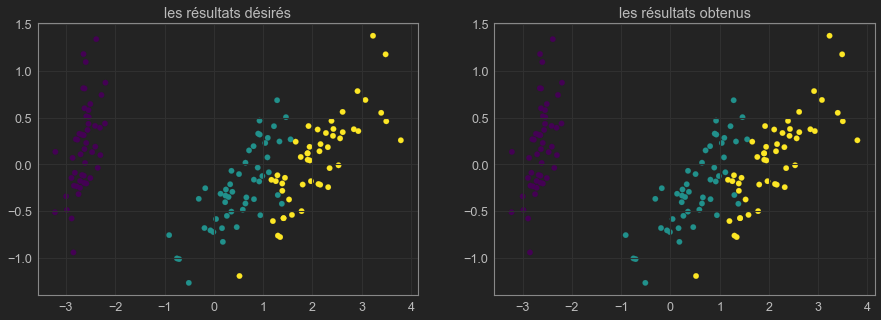

In [67]:
target_pr = grid.predict(data)
plot_result(data_tr, target, target_pr)

## C) Réduction de dimensions avec un Perceptron Multi-Couches

1. Entraînez un MLP à retrouver les vecteurs d'entrée en sortie (la sortie doit être la même
que l'entrée) sur la base de données Iris. On utilisera ici deux neurones cachés et une
fonction d'activation linéaire.


In [69]:
MLPC = MLPClassifier(hidden_layer_sizes=2, activation='relu', learning_rate_init=0.1, solver='lbfgs')
target_pr = MLPC.fit(data, target).predict(data)
print('accuracy_score : ', accuracy_score(target, target_pr))

accuracy_score :  0.3333333333333333


2. Après apprentissage, calculez les sorties de la couche cachée pour chaque point de
données en utilisant la matrice de poids (coef) et les données en entrées. Vous obtenez
deux valeurs par points, qui donnent de nouvelles coordonnées pour chaque point.
Affichez ces valeurs dans une figure (avec les classes réelles représentées en couleur).


3. Que représente cette figure ?

4. Si on utilise une fonction d'activation logistique, qu'est ce que ça change (et pourquoi ?).